In [3]:
%cd "../"
%pwd

import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from Wrapper_FS import *
from hybrid_FS import *

np.random.seed(1)
random.seed(1)

/Users/dormann/Documents/GitHub/src


# Baseline with preselected genes for AE4

In [4]:
#Load preprocess data
AE4 = np.array(pd.read_csv ('../data/processed_data/AE4intron.csv'))
y = np.array(AE4[:,-1],dtype=int)
AE4 = AE4[:,0:-1]

In [5]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4,y,4)

In [6]:
print(AE4.shape, len(pred))
acc = model.score_
print(acc,model.recovery)

(1469, 10975) 1469
0.06652512384996462 0.9053778080326753


In [7]:
print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

sensitivity, specificity, precision, NPV, FDR, FNR =  (94, 1319, 0.0712661106899166, 0.24867724867724866, 0.9943543209348115, 0.06652512384996462, 0.9987789935295256, 0.9334748761500354, 0.7513227513227513)


# Filter methods

# Mutual information maximizer (MIM)

[   22    30    87   124   125   169   200   231   244   255   261   299
   329   366   370   371   387   449   453   458   525   550   582   642
   674   741   769   778   889   908   939  1011  1024  1038  1062  1094
  1111  1112  1187  1200  1256  1259  1282  1334  1341  1351  1354  1358
  1402  1451  1482  1487  1501  1515  1546  1698  1739  1743  1744  1789
  1809  1896  1943  1973  1992  2001  2129  2139  2172  2278  2354  2361
  2395  2450  2505  2526  2586  2593  2634  2649  2744  2783  2838  2857
  2869  2898  2998  3087  3094  3108  3130  3208  3218  3241  3254  3331
  3356  3357  3380  3389  3401  3403  3406  3410  3420  3423  3430  3444
  3454  3459  3460  3463  3467  3473  3483  3488  3491  3495  3502  3515
  3524  3526  3527  3543  3557  3563  3573  3578  3584  3591  3592  3613
  3628  3632  3633  3634  3639  3647  3653  3676  3679  3683  3685  3714
  3724  3726  3730  3734  3743  3754  3767  3770  3783  3785  3790  3791
  3793  3796  3798  3800  3803  3810  3811  3812  3

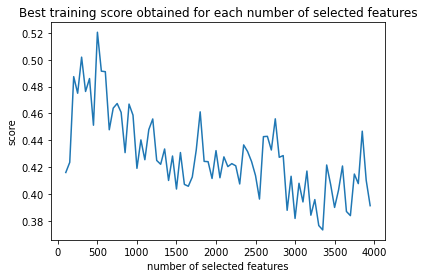

In [8]:
N = np.arange(100,4000,50)
best_subset, best_score = MIM(y, AE4, FamiliesClusters, compute_sensitivity,True,N, 3, plot=True)
print(best_subset, best_score)

In [9]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

500
sensitivity, specificity, precision, NPV, FDR, FNR =  (228, 1137, 0.20052770448548812, 0.5205479452054794, 0.9952655576606775, 0.16703296703296702, 0.999122176333874, 0.832967032967033, 0.4794520547945205)


# ANOVA

[   72   124   125   169   200   237   243   244   255   261   329   371
   425   449   453   458   525   550   582   642   658   674   741   760
   778   937   939  1003  1023  1024  1062  1094  1112  1187  1221  1259
  1282  1283  1351  1354  1358  1482  1487  1515  1662  1682  1691  1737
  1739  1743  1943  1977  1992  2001  2129  2139  2172  2278  2354  2361
  2409  2450  2505  2586  2593  2634  2649  2713  2783  2838  2869  2889
  2898  2976  2998  3087  3094  3155  3208  3218  3246  3254  3331  3395
  3401  3403  3406  3410  3412  3423  3430  3444  3454  3460  3463  3467
  3473  3488  3491  3495  3502  3524  3526  3527  3543  3557  3563  3572
  3591  3592  3613  3628  3633  3634  3639  3647  3653  3679  3685  3705
  3730  3743  3754  3785  3790  3791  3793  3796  3798  3800  3810  3812
  3815  3829  3834  3855  3868  3876  3926  3929  3962  4010  4011  4082
  4106  4162  4191  4248  4261  4289  4345  4416  4461  4506  4513  4518
  4569  4582  4667  4676  4677  4694  4707  4788  4

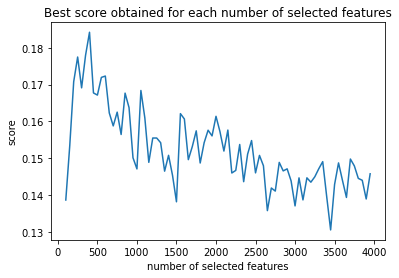

In [10]:
N = np.arange(100,4000,50)
best_subset, best_score = ANOVA(y, AE4, FamiliesClusters, compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [11]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

400
sensitivity, specificity, precision, NPV, FDR, FNR =  (255, 1129, 0.22586359610274578, 0.5151515151515151, 0.9952505552938009, 0.1842485549132948, 0.9989865849178501, 0.8157514450867052, 0.48484848484848486)


# Fisher's score

[    1     3     6 ... 10970 10972 10974] 0.04832214765100671


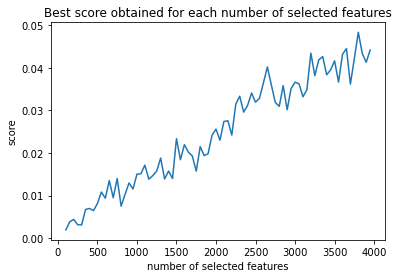

In [12]:
N = np.arange(100,4000,50)
best_subset, best_score = fishers_score(y, AE4, FamiliesClusters,compute_precision,True,N, plot=True)
print(best_subset, best_score)

In [13]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

3800
sensitivity, specificity, precision, NPV, FDR, FNR =  (72, 1418, 0.05077574047954866, 0.17777777777777778, 0.9936003032860502, 0.04832214765100671, 0.9984897137259171, 0.9516778523489933, 0.8222222222222222)


# Laplacian score

[    0     2     4 ... 10966 10968 10969] 0.043676662320730114


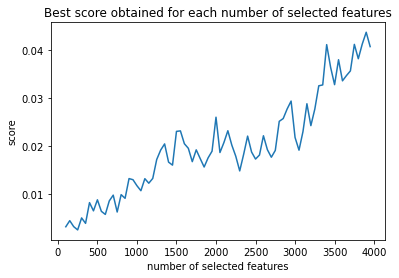

In [14]:
N = np.arange(100,4000,50)
best_subset, best_score = laplacian_score(y, AE4, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [15]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

3900
sensitivity, specificity, precision, NPV, FDR, FNR =  (67, 1467, 0.04567143830947512, 0.16666666666666666, 0.993165172664418, 0.043676662320730114, 0.9984309427458034, 0.9563233376792699, 0.8333333333333334)


# ReliefF algorithm

[    1     7    12 ... 10964 10970 10972] 0.04161248374512354


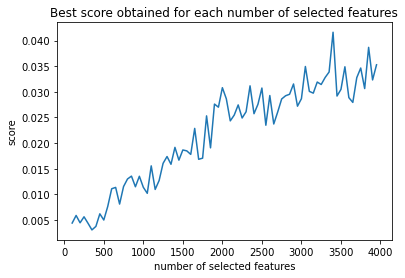

In [16]:
N = np.arange(100,4000,50)
best_subset, best_score = reliefF(y, AE4, FamiliesClusters,compute_precision,True, N, 5, plot=True)
print(best_subset, best_score)

In [17]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

3400
sensitivity, specificity, precision, NPV, FDR, FNR =  (64, 1474, 0.04341926729986431, 0.16623376623376623, 0.9931413149690568, 0.04161248374512354, 0.9984982947926851, 0.9583875162548765, 0.8337662337662337)


# Fast Correlation Based Filter algorithm (FCBF)

[    0     3     7 ... 10972 10973 10974] 0.041501976284584984


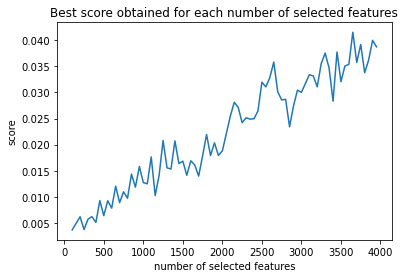

In [18]:
N = np.arange(100,4000,50)
best_subset, best_score = FCBF(y, AE4, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [19]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

3650
sensitivity, specificity, precision, NPV, FDR, FNR =  (63, 1455, 0.04329896907216495, 0.15555555555555556, 0.9933209085400562, 0.041501976284584984, 0.9984220070040741, 0.958498023715415, 0.8444444444444444)


# Wrapper methods

# Stimulated annealing

In [ ]:
best_subset, best_score  = stimulated_annealing(y,AE4, FamiliesClusters, compute_precision,True, 200, 0.1, 1, True)
print(best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Genetic feature selection algorithm

In [ ]:
best_subset, best_score  = genetic_fs(y,AE4,FamiliesClusters, compute_precision,True, 300, 0.5, 0.2, 50, 3, True)
print(best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Hybrid methods

# Mutual information and stimmulated annealing

In [ ]:
best_subset, best_score = MI_stimulated_annealing(y,AE4, FamiliesClusters, compute_sensitivity,True, np.array([400]), 3, 800, 0.1, 1, True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate 
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Mutual information and genetic feature selection

In [ ]:
best_subset, best_score = MI_genetic_fs(y,AE4, FamiliesClusters, compute_sensitivity,True, np.array([850]), 3,  100, 0.5, 0.2, 40, 3, True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)
print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Best method = 